<a href="https://colab.research.google.com/github/tiffanyndanu/KNN-NaiveBayes/blob/main/Naive_Bayes_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naive Bayes Classifier**

# **1. Defining the question**

## **a) Specifying the Data Analytic Question**

Determining whether a given email is spam or not.

## **b) Defining the Metric for Success**

The model that will be considered a succes will be the one that provides the most accurate analysis of whether an email is spam or not.

## **c) Understanding the Context**

The UCI Machine Learning Centre gathered the data used in this experiment. It's a collection of spam e-mails sent by their postmaster and spammers. Non-spam e-mails were gathered from archived professional and personal e-mails, therefore the word 'george' and the area code '650' are non-spam identifiers. These are helpful when creating a custom spam filter. To create a general-purpose spam filter, one would either have to blind such non-spam indications or obtain a large collection of non-spam.

It has previously been used for determining whether an email is spam or not, which means that this data is relevant and sufficient for this analysis.

Data description: The first 54 features (continuous, real [0,100] indicate the percent of words in an email matching a particular word (any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string) or character. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters (continuous real/integer [1,...]. The last attribute (nominal {0,1} class) denotes whether the e-mail was considered spam (1) or not (0).

The data provided is a csv file with two accompanying text documentation files.

## **d) Recording the Experimental Design**

The following are the steps taking during the study:

1.Read and exploring the dataset.

2.Define the appropriateness of the available data to answer the given question.

3.Find and deal with outliers, anomalies and missing data within the dataset.

4.Perform univariate, bivariate and multi-variate analysis recording observations.

5.Build our classification models using Naive Bayes Classifier.

6.Do different dataset splits(80-20, 70-30, 60-40) for the train and test sets and make observations of the model performance.

7.Optimize model performance and challenge the solution.

8.Give a conclusion and recommendations from the analysis.


## **e) Data Relevance**

The data provided is very relevant and has a wide range of variables to consider in achieving our main objective of this project.



# **2. Reading the Data**

In [1]:
# loading basic Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define the column names
spam_columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your',
'word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george',
'word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data',
'word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(',
'char_freq_[','char_freq_exclamation','char_freq_dollar','char_freq_hashtag','capital_run_length_average',
'capital_run_length_longest','capital_run_length_total','spam']
# 
spam=pd.read_csv("spambase.data", names=spam_columns)
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# **3. Checking the Dataset**

In [4]:
# Determining the no. of records in our dataset

spam.shape

(4601, 58)

In [7]:
# Previewing our dataset

spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [9]:
# let's check the dataset information

spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# **4. Cleaning**

In [10]:
# checking for duplicates
 
spam.duplicated().sum()

391

In [11]:
# dealing with the duplicates

spam = spam.drop_duplicates()
spam.shape

(4210, 58)

391 duplicates have been dropped.

In [12]:
# Identifying the Missing Data

spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

There are no missing values.

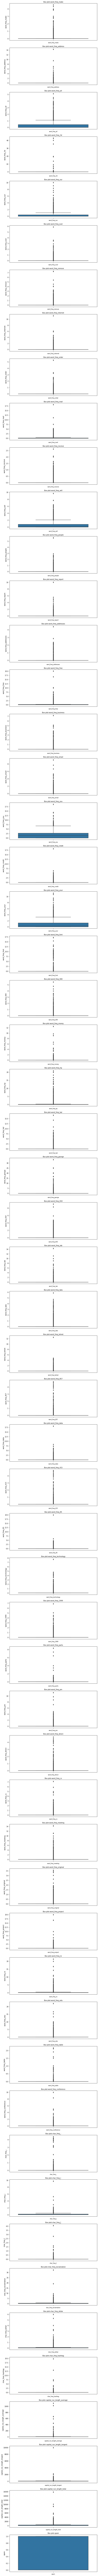

In [13]:
# checking for outliers


plt.show()

fig, ax = plt.subplots(len(spam.columns), figsize = (10, 300))

for i, col_val in enumerate(spam.columns):

  sns.boxplot(y= spam[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

In [14]:
# Confirming the amount of outliers

df1 = spam[['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your',
'word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george',
'word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data',
'word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(',
'char_freq_[','char_freq_exclamation','char_freq_dollar','char_freq_hashtag','capital_run_length_average',
'capital_run_length_longest','capital_run_length_total','spam']]
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()

word_freq_make                 982
word_freq_address              811
word_freq_all                  293
word_freq_3d                    46
word_freq_our                  449
word_freq_over                 933
word_freq_remove               762
word_freq_internet             767
word_freq_order                722
word_freq_mail                 748
word_freq_receive              651
word_freq_will                 250
word_freq_people               806
word_freq_report               336
word_freq_addresses            305
word_freq_free                 830
word_freq_business             906
word_freq_email                972
word_freq_you                   58
word_freq_credit               389
word_freq_your                 193
word_freq_font                 112
word_freq_000                  619
word_freq_money                659
word_freq_hp                  1012
word_freq_hpl                  789
word_freq_george               667
word_freq_650                  452
word_freq_lab       

There is a large number of outliers. If dropped, the amount of data might be insufficient for analysis.

# **5. Exploratory Analysis**

In [16]:
# previewing the statistical characteristics of the dataset

spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


# Univariate

0    2531
1    1679
Name: spam, dtype: int64


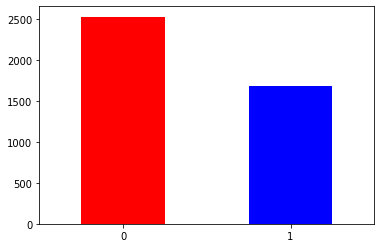

In [17]:
# checking how many are spam and how many are not

spam.spam.value_counts().plot(kind = 'bar', rot = 0, color = ['red', 'blue'])
print(spam.spam.value_counts())

In [18]:
# finding the median

spam.median().sort_values(ascending=False)

capital_run_length_total      101.500
capital_run_length_longest     15.000
capital_run_length_average      2.297
word_freq_you                   1.360
word_freq_your                  0.290
word_freq_will                  0.190
char_freq_(                     0.073
char_freq_exclamation           0.016
word_freq_parts                 0.000
word_freq_cs                    0.000
word_freq_direct                0.000
word_freq_pm                    0.000
word_freq_make                  0.000
word_freq_1999                  0.000
word_freq_technology            0.000
word_freq_85                    0.000
word_freq_415                   0.000
word_freq_meeting               0.000
word_freq_re                    0.000
word_freq_original              0.000
word_freq_project               0.000
word_freq_857                   0.000
word_freq_edu                   0.000
word_freq_table                 0.000
word_freq_conference            0.000
char_freq_;                     0.000
char_freq_[ 

In [19]:
# finding the median

spam.median().sort_values(ascending=False)

capital_run_length_total      101.500
capital_run_length_longest     15.000
capital_run_length_average      2.297
word_freq_you                   1.360
word_freq_your                  0.290
word_freq_will                  0.190
char_freq_(                     0.073
char_freq_exclamation           0.016
word_freq_parts                 0.000
word_freq_cs                    0.000
word_freq_direct                0.000
word_freq_pm                    0.000
word_freq_make                  0.000
word_freq_1999                  0.000
word_freq_technology            0.000
word_freq_85                    0.000
word_freq_415                   0.000
word_freq_meeting               0.000
word_freq_re                    0.000
word_freq_original              0.000
word_freq_project               0.000
word_freq_857                   0.000
word_freq_edu                   0.000
word_freq_table                 0.000
word_freq_conference            0.000
char_freq_;                     0.000
char_freq_[ 

In [20]:
# finding the skewness

spam.skew().sort_values(ascending=False)

char_freq_hashtag             31.500180
capital_run_length_longest    31.205495
word_freq_3d                  27.209539
word_freq_parts               27.078694
capital_run_length_average    22.760655
char_freq_[                   21.271982
word_freq_table               19.298485
word_freq_conference          18.871757
char_freq_exclamation         18.337278
word_freq_project             18.196824
word_freq_85                  16.001762
word_freq_money               15.556682
word_freq_credit              15.430174
char_freq_(                   14.002666
word_freq_telnet              13.514852
word_freq_address             13.464664
char_freq_;                   13.355885
word_freq_data                13.069355
word_freq_pm                  11.762303
word_freq_lab                 11.683591
word_freq_report              11.564142
word_freq_cs                  11.468806
char_freq_dollar              10.608970
word_freq_857                 10.432463
word_freq_415                 10.339838


From the output, it appears that all the variables are positively skewed.

In [21]:
# finding kurtosis

spam.kurt().sort_values(ascending=False)

capital_run_length_longest    1471.215610
char_freq_hashtag             1238.321018
word_freq_parts                836.229272
word_freq_3d                   788.370058
char_freq_[                    664.620378
capital_run_length_average     614.399885
char_freq_exclamation          579.438464
word_freq_conference           492.146945
word_freq_85                   491.541633
word_freq_project              449.017717
word_freq_table                431.309247
word_freq_credit               424.685771
char_freq_(                    404.370138
word_freq_money                340.175773
word_freq_address              306.685973
word_freq_telnet               302.369897
word_freq_data                 290.736221
word_freq_report               219.645155
word_freq_pm                   205.959198
char_freq_;                    200.449787
word_freq_lab                  189.408655
char_freq_dollar               188.462692
word_freq_internet             167.550219
word_freq_cs                   166

In [24]:
# selecting random variables to view their distributions since there are too many variables
# to do them all

import random
sample = random.sample(spam_columns, k = 15)
sample

['word_freq_address',
 'word_freq_data',
 'word_freq_re',
 'word_freq_george',
 'spam',
 'word_freq_mail',
 'word_freq_money',
 'word_freq_3d',
 'word_freq_addresses',
 'word_freq_email',
 'word_freq_all',
 'word_freq_project',
 'word_freq_credit',
 'word_freq_order',
 'word_freq_85']

# Bivariate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


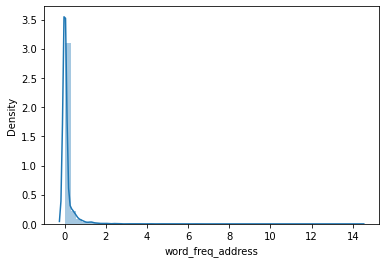

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


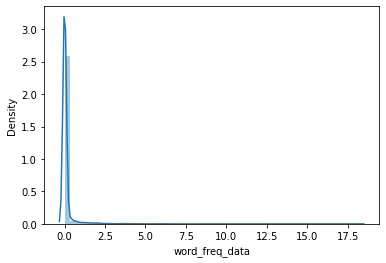

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


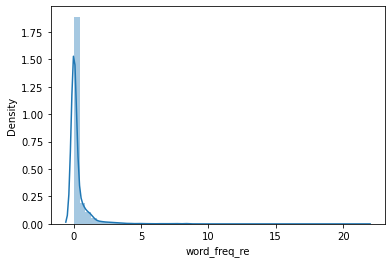

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


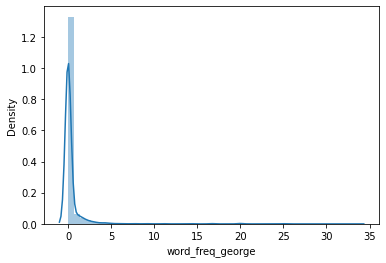

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


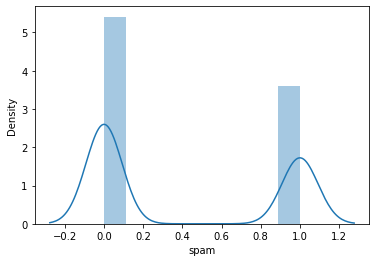

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


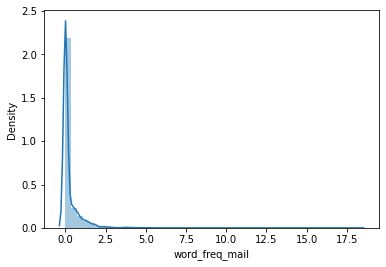

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


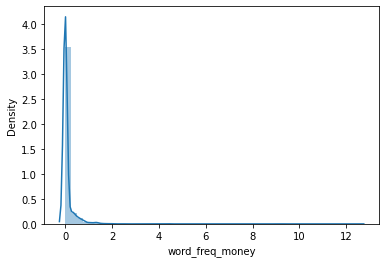

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


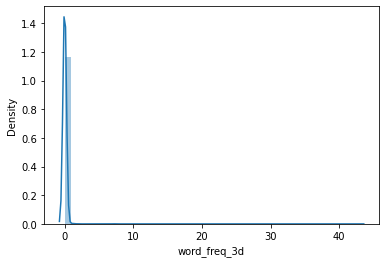

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


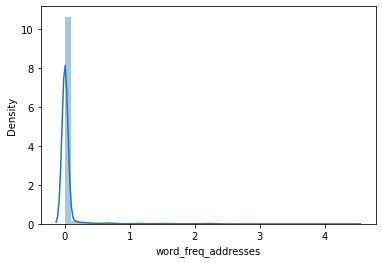

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


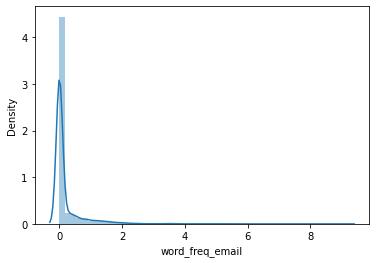

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


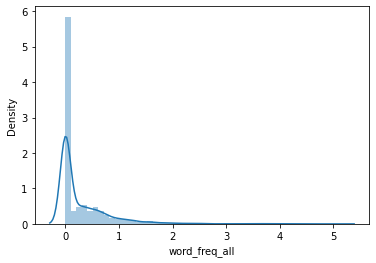

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


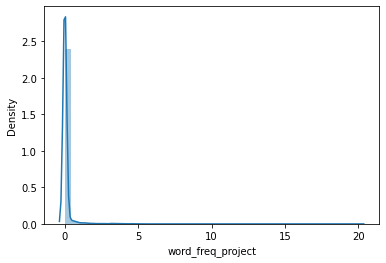

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


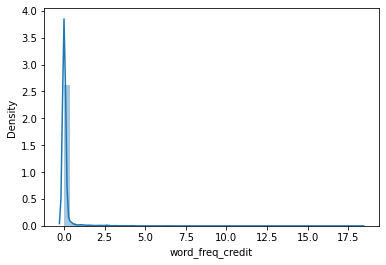

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


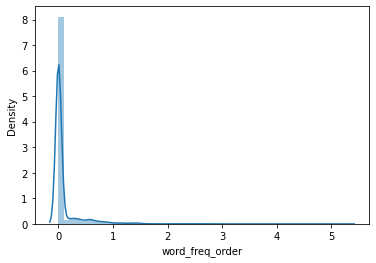

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


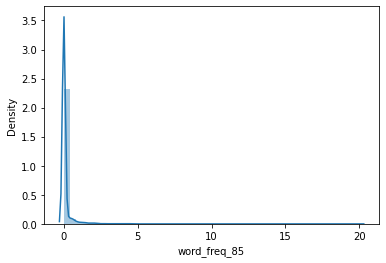

In [28]:
for item in sample:
    sns.distplot(spam[item])
    plt.show()

# **6. Modelling**

Implementing the solution

In [31]:
# Finding multicollinearity using VIF
# 
from statsmodels.stats.outliers_influence import variance_inflation_factor
   
# the independent variables set
X = spam.iloc[:,:-1]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                       feature         VIF
0               word_freq_make    1.229407
1            word_freq_address    1.173538
2                word_freq_all    1.400882
3                 word_freq_3d    1.006264
4                word_freq_our    1.324950
5               word_freq_over    1.192613
6             word_freq_remove    1.215999
7           word_freq_internet    1.173639
8              word_freq_order    1.314221
9               word_freq_mail    1.275207
10           word_freq_receive    1.293204
11              word_freq_will    1.452327
12            word_freq_people    1.179703
13            word_freq_report    1.078906
14         word_freq_addresses    1.391345
15              word_freq_free    1.174359
16          word_freq_business    1.332468
17             word_freq_email    1.326938
18               word_freq_you    2.108006
19            word_freq_credit    1.115386
20              word_freq_your    1.924680
21              word_freq_font    1.311079
22         

The 2 columns with high multicollinearity will be dropped.

In [32]:
# Define our x and y
# 
X = spam.iloc[:,:-1]
y = spam.iloc[:,-1]

In [33]:
# Feature scaling
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
# import and train LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()
lda = lda.fit(X, y)
lda_feat = lda.transform(X)

#lda coefficients
lda.coef_

# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
Important_features = pd.DataFrame(index=X.columns.values, data=lda.coef_[0].T)
Important_features.sort_values(0, ascending=False)

,0
char_freq_dollar,2.377198
word_freq_remove,1.966993
word_freq_000,1.555275
word_freq_receive,1.338032
word_freq_over,1.073004
word_freq_internet,0.806390
word_freq_free,0.788806
word_freq_our,0.744870
word_freq_money,0.692884
word_freq_order,0.600602


# **Gaussian Naives Bayes Classifier**

We will split the model in three ways The 80-20, 70-30, 60-40 split.

We will use a for loop to accomplish this all in one code.

In [35]:
# We will use the Gausian Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics

In [36]:
splits = [0.1, 0.2, 0.3, 0.4, 0.5]

from sklearn.model_selection import train_test_split as tts

for test in splits:
    X_train, X_test, y_train, y_test = tts(X, y, test_size = test, random_state = 12)
    
    # fitting to classifier
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    
    # making predictions
    y_pred = clf.predict(X_test)

    # evaluating the algorithm
    print("The test size {} has accuracy score:".format(test), accuracy_score(y_test, y_pred))

The test size 0.1 has accuracy score: 0.833729216152019
The test size 0.2 has accuracy score: 0.8420427553444181
The test size 0.3 has accuracy score: 0.833729216152019
The test size 0.4 has accuracy score: 0.834916864608076
The test size 0.5 has accuracy score: 0.833729216152019


We can see that an 80-20 split yields the highest accuracy score (84.2%)

## **Challenging the Solution**

In this section we will use logistic regression.

In [37]:
# x is the independent variable
# y is the target variable(price)
# 
X = spam.drop(columns = ['spam'], axis=1)
y = spam['spam']
# 
# Splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
# 
# Standardising the X_train and the X_test to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Training the model
# 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# 
# Fitting the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
# 
# Making predictions using the model above
# 
preds = logmodel.predict(X_test)
# 
# Getting the accuracy of our model
from sklearn.metrics import accuracy_score, r2_score,mean_absolute_error, mean_squared_error
import scipy.stats as stats
print("Logistic Regression model accuracy is", accuracy_score(y_test,preds))

Logistic Regression model accuracy is 0.9251781472684085


The logistic regresiion model has a higher accuracy score than the Gaussian Naive Bayes model.

# **Conclusion**

The 80-20 split gave the highest accuracy score of 84.02% followed by 70-30 split and 80-20 split.

An 84.02% accuracy score is fairly good but can do with some improvement.

The model created using Logistic Regression performed much better with an accuracy score of 87.05%

# **Recommendations**

We'd recommend the use of the 80-20 data split when using the gaussian naive bayes classifier since it gave the best accuracy score.

The use of Logistic Regression seems to be the best option for this problem as it gave the highest accuracy level.

**#  Follow up question**s

a). Did we have the right data?

Yes, I beleive tha the data was right in the classification of spam emails.

b). Do we need other data to answer our question?

Not necessarily because the dataset we used was adequate for answering our question.

c). Did we have the right question?

Yes we did.